# INTRODUCTION TO EXPLORATORY DATA ANALYSIS (EDA)

Machine learning is a subset of Data Science. In Machine Learning, we build models that are capable of learning from data without it being explicitly programmed with the help of predefined algorithms.
-   Before starting the EDA process, its quite important to have a good understanding of the data science pipeline and your role in it as a data scientist. I believe this is what makes Data Science as the sexiest job of the 21st century. [Harvard Business Review](https://hbr.org/2021/10/data-scientist-the-sexiest-job-of-the-21st-century)

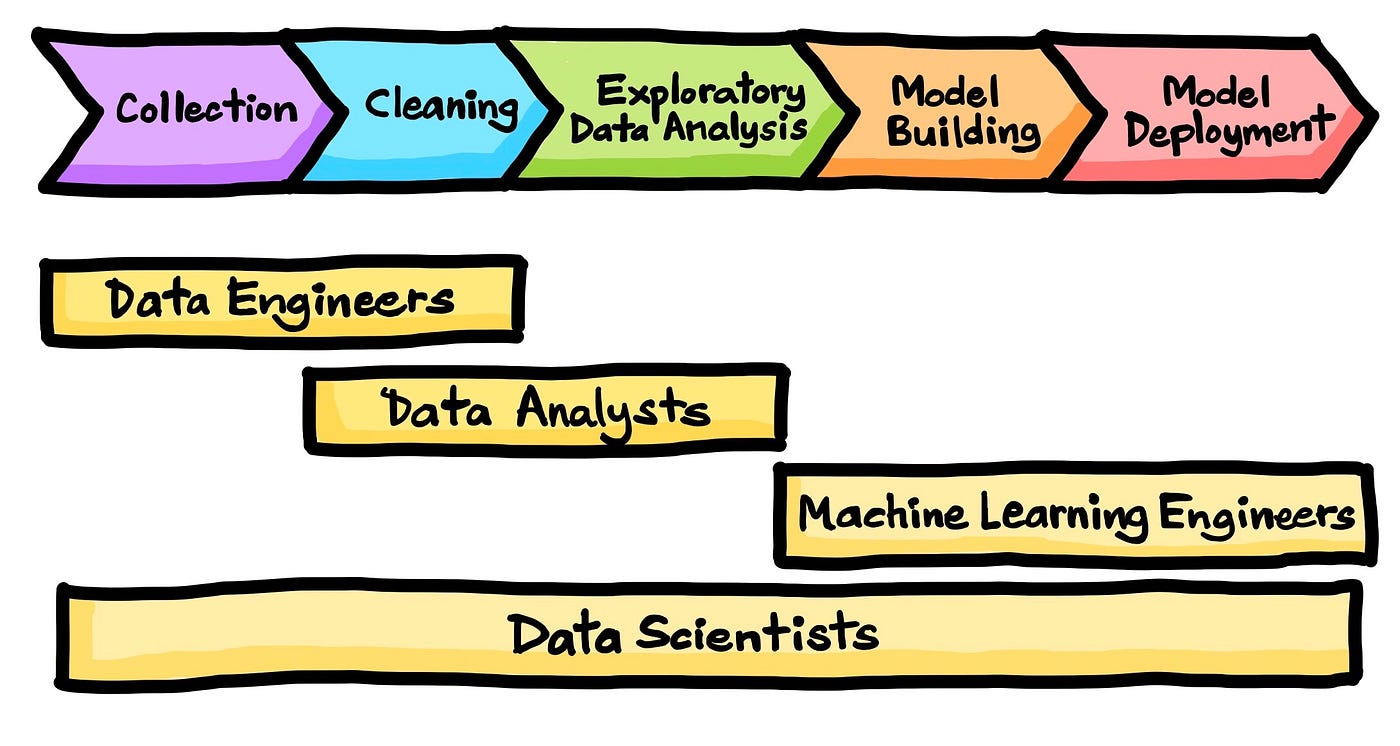


## EXPLORATORY DATA ANALYSIS

The science in data science is EDA. This is where you have to experiment with your data. EDA is an empirical process that leverages scientific methods to **experiement, understand**, and **find relationships** between the features in your dataset to generate insights and validate hypothesis.

EDA is an iterative process, sometimes it includes PDA, Data Cleaning, **one variable, two variable**, and **multi-variable analysis**. It will help you understand the strucure of your data, discover patterns and gain insights.

For most dataset, it is advisable to carry out your EDA first before data cleaning. This will help you have a good knowledge of your dataset before commencing any form of manipulation, deletion or transformation.

EDA starts by understanding the distribution of your data. It's essential to know the **measures of center,** such as mean, median, and mode, as well as the **measure of spread and variability**. This knowledge helps you identify outliers, which are data points significantly different from others, and handle them appropriately.

**There are two broad reasons for EDA**
1.  To prepare data for machine learning models.
2.  To understand patterns and insights in data more generally.

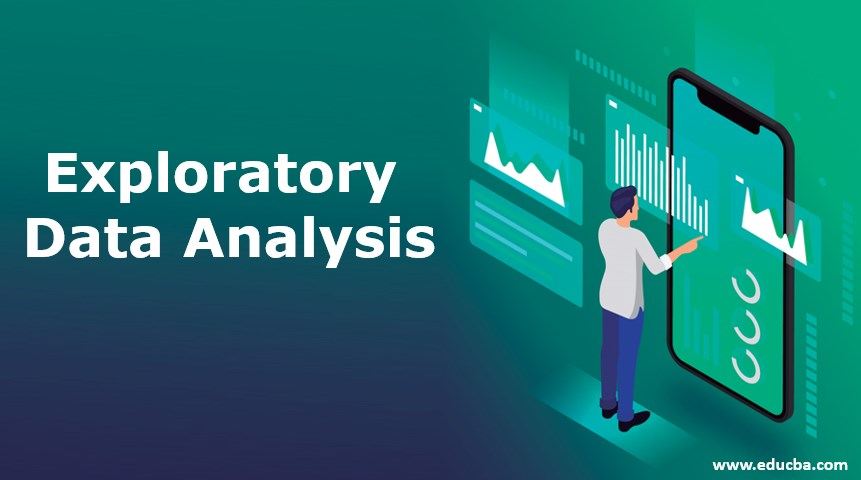

**What Are The Best Practices for EDA?**

1.  **Understand Your Data:** Before embarking on any analysis, it is crucial to familiarize yourself with the dataset by carrying out preliminary analysis (PDA)
2.  **Visualize Your Data:** To gain a quick insight into what your data represents and what it is saying, you have to visualize. This will help you to have a clearer picture of your data.
3.  **Handle Missing Data:** It is essential to identify and understand the nature of missing values in your dataset. Decide on any appropriate strategy for handling mmissing data. Whatever approach you choose, ensure transparency in your methods to maintain the reproducibility of your analysis.
4.  **Check for Outliers:** Ensure to consider the context of your analysis and the nature of the data when deciding whether to keep or remove outliers. In some cases, outliers may represent valid observations and should be retained; in others, they may indicate errors and should be removed.
5.  **Explore Relationships:** EDA is not just about exploring individual variables but also about understanding the relationships between variables. During your exploration look for tends, dependencies, and potential confounding factors that may influence your analysis. Understanding these relationships is crucial for making informed decisions and deriving meaningful insights from your data.
6.  **Segment Your Data:** Data segmentation involves dividing your dataset into meaningful categories or segments to analyze patterns and trends more effectively. By segmenting data based on relevant criteria such as demographics, geography, or behavior, you can gain deeper insights and tailor your analysis to specific groups.
7.  **Use Descriptive Statistics:** Descriptive statistics, such as mean, median, standard deviation, and quartiles, provide a summary of your data's central tendency and dispersion. These statistics help you understand the distribution of your data and identify outerliers or patterns that may require further investigation.
8.  **Consider Time Trends:** Analyzing time trends is crucial if your data has a temporal component. Time series analysis can reveal patterns, seasonality, and trends over time. Visualizing data using line charts or seasonal decomposition plots can help you understand how variables change over different periods.
9.  **Assess Multicollinearity:** Multicollinearity occurs when independent variables in a regression model are highly correlated, leading to unstable estimates. To assess multicollinearity, calculate correlation coefficients between predictors and consider using variance inflation factors (VIFs) to identify problematic variables.
10. **Document Your Process:** Documenting your exploratory data analysis (EDA) process is essential for reproducibility and collaboration. Keep a record of the steps you take, the insights you uncover, and any decisions you make during the analysis. This documentation ensures that others can understand and reproduce your analysis, leading to more reliable results.



[wine quality dataset](https://archive.ics.uci.edu/static/public/186/wine+quality.zip)

<hr>

### **0.  Data Ingestion, Preliminary Data Analysis**

<hr>

In [1]:
%%capture

%pip install seaborn matplotlib pandas numpy

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt
import zipfile
import pandas as pd
import numpy as np
import os

In [ ]:
zip_path = r"C:"

with zipfile.ZipFIle(zip_path, 'r') as zip_ref:
    zip_ref.printdir()
    